# Plots to Analyze the Baseline Training Process

In [1]:
import os
os.getcwd()

'/Users/lukasfehring/Desktop/MasterThesis/architectures-in-rl'

## Plot Smac Callbacks

### Net2Deeper with episode_length 900

In [2]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

In [3]:
net2deeper_smac_callbacks = get_logtable(database_name="fehring_growing_nn", table_name="net2deeper", logtable_name="smac_callbacks", config_file="approach/net2deeper/config/net2deeper.yaml")
net2deeper_run = net2deeper_smac_callbacks[net2deeper_smac_callbacks["experiment_id"] == 1]
net2deeper_run.head()

2024-06-28 14:37:36,297  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-06-28 14:37:36,298  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-06-28 14:37:36,299  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-06-28 14:37:36,299  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-06-28 14:37:36,300  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-06-28 14:37:36,300  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-06-28 14:37:36,300  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-06-28 14:37:36,301  | py-experimenter - WARNING  | No values given for keyfield seed
2024-06-28 14:37:36,301  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-06-28 14:37:36,301  | py-experimenter - WARNING  | No values given for keyfield n_ev

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-06-26 17:34:27,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",2.4644
1,2,1,2024-06-26 17:46:09,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",2.6522
2,3,1,2024-06-26 17:58:17,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",2.3738
3,4,1,2024-06-26 18:22:19,4,1,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",2.9492
4,5,1,2024-06-26 18:49:00,5,1,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",2.7902


### BlackBox with Episode Length 900

In [4]:
blackbox_smac_callbacks = get_logtable(database_name="fehring_growing_nn", table_name="black_box_run", logtable_name="smac_callbacks", config_file="baselines/blackbox_joined_hpo_nn/config/blackbox_joined_hpo_nn.yaml")
blackbox_run = blackbox_smac_callbacks[blackbox_smac_callbacks["experiment_id"] == 1]
blackbox_run.head()

2024-06-28 14:37:37,748  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-06-28 14:37:37,749  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-06-28 14:37:37,749  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-06-28 14:37:37,750  | py-experimenter - WARNING  | No values given for keyfield observation_keys


2024-06-28 14:37:37,751  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-06-28 14:37:37,752  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-06-28 14:37:37,753  | py-experimenter - WARNING  | No values given for keyfield seed
2024-06-28 14:37:37,754  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-06-28 14:37:37,755  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-06-28 14:37:37,755  | py-experimenter - WARNING  | No values given for keyfield total_timesteps
2024-06-28 14:37:37,756  | py-experimenter - WARNING  | No values given for keyfield smac_budget
2024-06-28 14:37:37,757  | py-experimenter - INFO     | Found 11 keyfields
2024-06-28 14:37:37,758  | py-experimenter - INFO     | Found 2 resultfields
2024-06-28 14:37:37,759  | py-experimenter - INFO     | Found 5 logtables
2024-06-28 14:37:37,761  | py-experimenter - INFO     | Found logtab

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-06-27 11:15:47,1,None,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",2.4644
1,2,1,2024-06-27 11:27:22,2,None,"{'batch_size': 256, 'ent_coef': 0.107882379647...",2.9304
2,3,1,2024-06-27 11:38:15,3,None,"{'batch_size': 128, 'ent_coef': 0.229283551219...",1.1074
3,4,1,2024-06-27 12:03:09,4,None,"{'batch_size': 32, 'ent_coef': 0.0017112052068...",2.9304
4,5,1,2024-06-27 12:33:12,5,None,"{'batch_size': 32, 'ent_coef': 0.2912519236095...",2.9536


In [5]:
# Select relevant columns
net2deeper_run_relevant = net2deeper_run[["trial_number", "cost"]].sort_values(by="trial_number")
blackbox_run_relevant = blackbox_run[["trial_number", "cost"]].sort_values(by="trial_number")

# Remove non incumbents - therefore valeus where the cost did not decrease compared  all previous costs
net2deeper_run_relevant["cost"] = net2deeper_run_relevant["cost"].cummin()
blackbox_run_relevant["cost"] = blackbox_run_relevant["cost"].cummin()

<Axes: xlabel='trial_number', ylabel='cost'>

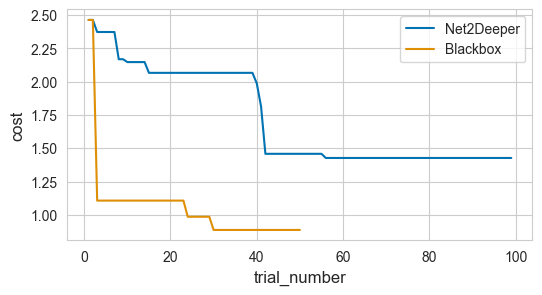

In [6]:
sns.lineplot(data=net2deeper_run_relevant, x="trial_number", y="cost", label="Net2Deeper")
sns.lineplot(data=blackbox_run_relevant, x="trial_number", y="cost", label="Blackbox")

# Plot blackbox incumbent learning curve

In [7]:
blackbox_inumbent_id = blackbox_run[blackbox_run["cost"] == blackbox_run["cost"].min()]["trial_number"].values[0]
blackbox_inumbent_id

30

In [8]:
black_box_trianing_process = get_logtable(database_name="fehring_growing_nn", table_name="black_box_run", logtable_name="training_process", config_file="baselines/blackbox_joined_hpo_nn/config/blackbox_joined_hpo_nn.yaml")
black_box_incumbent_trianing_process = black_box_trianing_process[black_box_trianing_process["experiment_id"] == 1]
black_box_incumbent_trianing_process = black_box_incumbent_trianing_process[black_box_incumbent_trianing_process["trial_number"] == blackbox_inumbent_id]

2024-06-28 14:37:39,419  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-06-28 14:37:39,419  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-06-28 14:37:39,420  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-06-28 14:37:39,420  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-06-28 14:37:39,421  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-06-28 14:37:39,423  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-06-28 14:37:39,426  | py-experimenter - WARNING  | No values given for keyfield seed
2024-06-28 14:37:39,430  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-06-28 14:37:39,432  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-06-28 14:37:39,433  | py-experimenter - WARNING  | No values given for keyfield total_time

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

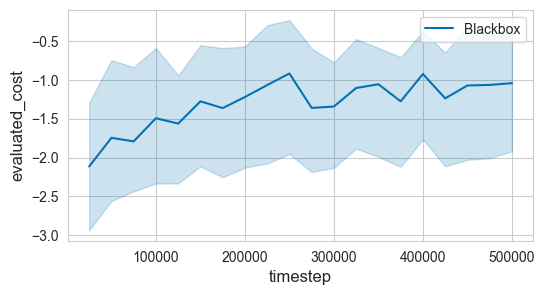

In [9]:
# Plot mean of mean per worker
sns.lineplot(data=black_box_incumbent_trianing_process, x="timestep", y="evaluated_cost", label="Blackbox")

# Plot net2net incumbent

In [10]:
net2net_incumbent_id = net2deeper_run[net2deeper_run["cost"] == net2deeper_run["cost"].min()]["trial_number"].values[0]
net2net_incumbent_id

56

In [11]:
configruations = get_logtable(database_name="fehring_growing_nn", table_name="net2deeper", logtable_name="configurations", config_file="approach/net2deeper/config/net2deeper.yaml")
net2net_run = configruations[configruations["experiment_id"] == 1]
net2net_incumbent_config = net2net_run[net2net_run["trial_number"] == net2net_incumbent_id]
compare_columns = ["batch_size","clip_range","clip_range_vf","ent_coef","gae_lambda",'learning_rate',"max_grad_norm","n_epochs","n_steps","normalize_advantage","vf_coef"]

2024-06-28 14:37:41,226  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-06-28 14:37:41,227  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-06-28 14:37:41,228  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-06-28 14:37:41,228  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-06-28 14:37:41,229  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-06-28 14:37:41,229  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-06-28 14:37:41,229  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-06-28 14:37:41,230  | py-experimenter - WARNING  | No values given for keyfield seed
2024-06-28 14:37:41,231  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-06-28 14:37:41,231  | py-experimenter - WARNING  | No values given for keyfield n_ev

In [12]:
trial_numbers = net2net_run[net2net_run["learning_rate"] == net2net_incumbent_config["learning_rate"].values[0]]["trial_number"].unique()
trial_numbers

array([39, 42, 49, 56, 59])

2024-06-28 14:37:42,731  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-06-28 14:37:42,731  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-06-28 14:37:42,732  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-06-28 14:37:42,733  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-06-28 14:37:42,733  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-06-28 14:37:42,734  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-06-28 14:37:42,734  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-06-28 14:37:42,735  | py-experimenter - WARNING  | No values given for keyfield seed
2024-06-28 14:37:42,735  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-06-28 14:37:42,736  | py-experimenter - WARNING  | No values given for keyfield n_ev

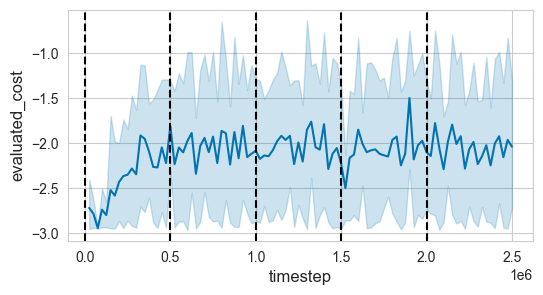

In [13]:
net2deeper_training_process = get_logtable(database_name="fehring_growing_nn", table_name="net2deeper", logtable_name="training_process", config_file="approach/net2deeper/config/net2deeper.yaml")
net2deeper_incumbent_training_process = net2deeper_training_process[net2deeper_training_process["experiment_id"] == 1]
net2deeper_incumbent_training_process = net2deeper_incumbent_training_process[net2deeper_incumbent_training_process["trial_number"] == net2net_incumbent_id]

new_df = pd.DataFrame(columns=net2deeper_incumbent_training_process.columns)
for new_budget, trial_number in enumerate(trial_numbers):
    relevant_df = net2deeper_training_process[net2deeper_training_process["trial_number"] == trial_number]
    relevant_df["timestep"] = relevant_df["timestep"] + new_budget * relevant_df["timestep"].max()
    new_df = pd.concat([new_df, relevant_df])
sns.lineplot(data=new_df, x="timestep", y="evaluated_cost")

# Add Vline for each budget
for budget in range(len(trial_numbers)):
    plt.axvline(x=500000 * budget, color="black", linestyle="--")